In [22]:
import pandas as pd
df_prd = pd.read_csv('prd_details_fixed.csv')
df_style = pd.read_csv('prd_style_match.csv')
df_senti = pd.read_csv('review_senti.csv')
df_review = pd.read_csv('prd_reviews.csv')

In [23]:
df_senti = df_senti[['상품url', 'content', 'sentiment']]
df_senti

,상품url,content,sentiment
0,https://ohou.se/productions/1001083/selling,잘 쓰고있습니당ㅎㅎ,positive
1,https://ohou.se/productions/1001083/selling,좋아요,positive
2,https://ohou.se/productions/1001083/selling,~~~~~~~다이소꺼 쓰다가 새로 샀는데 넘 이뻐요ㅠㅠ,positive
3,https://ohou.se/productions/1001083/selling,흰색 짱깨끗하고 디자인 기여워요 ㅎㅎ,positive
4,https://ohou.se/productions/1001083/selling,굿 잘쓸게용일단 디자인 너무 깔끔하구 예쁘구 음식이 달라붙지 않아서 너무 좋아요 :),positive
...,...,...,...
229118,https://ohou.se/productions/99878/selling,단점은.,negative
229119,https://ohou.se/productions/99878/selling,같이주는 3m이 잘 안붙어요.,neutral
229120,https://ohou.se/productions/99878/selling,앞정이나 핀 같은것도 동봉해주시면 좋을꺼 같아요,neutral
229121,https://ohou.se/productions/99878/selling,하나는 큰거로샀는데 걸기엔 퀄리티가 그냥그래서 비치타올로사용했어요!!,negative


In [24]:
df1 = df_senti.groupby(['상품url', 'sentiment']).count()

In [25]:
df1 = df1.reset_index()
df1

,상품url,sentiment,content
0,https://ohou.se/productions/1001083/selling,negative,22
1,https://ohou.se/productions/1001083/selling,neutral,29
2,https://ohou.se/productions/1001083/selling,positive,144
3,https://ohou.se/productions/100177/selling,negative,43
4,https://ohou.se/productions/100177/selling,neutral,37
...,...,...,...
3421,https://ohou.se/productions/97810/selling,neutral,22
3422,https://ohou.se/productions/97810/selling,positive,132
3423,https://ohou.se/productions/99878/selling,negative,23
3424,https://ohou.se/productions/99878/selling,neutral,34


In [26]:
df_pos = df1[df1['sentiment'] == 'positive']

In [27]:
df_total = df1.groupby('상품url').sum().reset_index()
df_total

,상품url,content
0,https://ohou.se/productions/1001083/selling,195
1,https://ohou.se/productions/100177/selling,233
2,https://ohou.se/productions/1002066/selling,195
3,https://ohou.se/productions/1003349/selling,247
4,https://ohou.se/productions/1003694/selling,216
...,...,...
1137,https://ohou.se/productions/969870/selling,266
1138,https://ohou.se/productions/973821/selling,204
1139,https://ohou.se/productions/97503/selling,175
1140,https://ohou.se/productions/97810/selling,185


In [28]:
df_ratio = df_pos.merge(df_total, how = 'inner', on = '상품url')
df_ratio['긍정비율'] = df_ratio['content_x'] / df_ratio['content_y']

In [29]:
df_ratio = df_ratio.rename(columns = {'content_x' : '긍정리뷰수', 'content_y' : '전체리뷰수'})
df_ratio

,상품url,sentiment,긍정리뷰수,전체리뷰수,긍정비율
0,https://ohou.se/productions/1001083/selling,positive,144,195,0.738462
1,https://ohou.se/productions/100177/selling,positive,153,233,0.656652
2,https://ohou.se/productions/1002066/selling,positive,144,195,0.738462
3,https://ohou.se/productions/1003349/selling,positive,146,247,0.591093
4,https://ohou.se/productions/1003694/selling,positive,142,216,0.657407
...,...,...,...,...,...
1137,https://ohou.se/productions/969870/selling,positive,143,266,0.537594
1138,https://ohou.se/productions/973821/selling,positive,146,204,0.715686
1139,https://ohou.se/productions/97503/selling,positive,133,175,0.760000
1140,https://ohou.se/productions/97810/selling,positive,132,185,0.713514


In [32]:
df_prd = pd.read_csv('prd_details_fixed.csv')
df_prd = df_prd[['상품url', '상품명']]
df_prd = df_prd.drop_duplicates()

In [30]:
df_ratio

,상품url,sentiment,긍정리뷰수,전체리뷰수,긍정비율
0,https://ohou.se/productions/1001083/selling,positive,144,195,0.738462
1,https://ohou.se/productions/100177/selling,positive,153,233,0.656652
2,https://ohou.se/productions/1002066/selling,positive,144,195,0.738462
3,https://ohou.se/productions/1003349/selling,positive,146,247,0.591093
4,https://ohou.se/productions/1003694/selling,positive,142,216,0.657407
...,...,...,...,...,...
1137,https://ohou.se/productions/969870/selling,positive,143,266,0.537594
1138,https://ohou.se/productions/973821/selling,positive,146,204,0.715686
1139,https://ohou.se/productions/97503/selling,positive,133,175,0.760000
1140,https://ohou.se/productions/97810/selling,positive,132,185,0.713514


In [33]:
df = df_ratio.merge(df_prd, how = 'left', on = '상품url')
df

,상품url,sentiment,긍정리뷰수,전체리뷰수,긍정비율,상품명
0,https://ohou.se/productions/1001083/selling,positive,144,195,0.738462,어스 IH 인덕션 양수냄비 20cm
1,https://ohou.se/productions/100177/selling,positive,153,233,0.656652,DSAD410 1000x400 베이직데스크 5colors
2,https://ohou.se/productions/1002066/selling,positive,144,195,0.738462,투명 트로피화병 양각 엔틱 유리꽃병
3,https://ohou.se/productions/1003349/selling,positive,146,247,0.591093,반려동물과 함께 알러지케어 옥수수솜 나란히 차렵이불세트 SS/Q 10colors
4,https://ohou.se/productions/1003694/selling,positive,142,216,0.657407,퓨어체어 7colors
...,...,...,...,...,...,...
1137,https://ohou.se/productions/969870/selling,positive,143,266,0.537594,뉴비스트로 400 2도어 빌트인 주방 수납장 비스포크 키큰 틈새장
1138,https://ohou.se/productions/973821/selling,positive,146,204,0.715686,바다 감성 인테리어 윤슬 여름 풍경 포스터 액자_pureness a boy A
1139,https://ohou.se/productions/97503/selling,positive,133,175,0.760000,내츄럴 베이지 워싱 식탁보 3size
1140,https://ohou.se/productions/97810/selling,positive,132,185,0.713514,원목 멀티탭 케이블정리함 전선 정리함 3colors


In [37]:
df[['상품명', 'sentiment', '긍정리뷰수', '전체리뷰수', '긍정비율']][10:20]

,상품명,sentiment,긍정리뷰수,전체리뷰수,긍정비율
10,(안전포장) TOKABO 토카보 단스탠드,positive,119,174,0.683908
11,우드접시 플레이트 모음,positive,131,197,0.664975
12,로망띠크 데이지 꽃 쿠션 등받이 겸 방석 소파쿠션 침대쿠션,positive,107,126,0.849206
13,[단독] 플라워 체커보드 프리미엄 터프팅 유니크 러그 욕실 발매트 2color,positive,144,182,0.791209
14,TEXTURED 코튼 러그 카페트 3size,positive,153,244,0.627049
15,2022년형 신제품 더함 43인치 안드로이드 OS11 스마트 TV,positive,156,214,0.728972
16,"알루미늄 액자 프레임 16종 A1, A2, A3, A4, 5070 등 24사이즈",positive,124,194,0.639175
17,엘리 라운드 수납 전신거울 2colors,positive,172,241,0.713693
18,앤유 버터 E0등급 다용도 3단 높은 수납장 2size,positive,178,272,0.654412
19,몽블랑 샤이니 디너포크 2Type,positive,165,204,0.808824


In [19]:
df[df['긍정비율'].isnull() == False]

,상품url,상품명,긍정비율
0,https://ohou.se/productions/538782/selling,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),0.717172
52,https://ohou.se/productions/880183/selling,[해외] 눈굴리는 곰돌이 빙수기 4종,0.686636
57,https://ohou.se/productions/710469/selling,[5%쿠폰] 데이지 비치우드 원목 디자인 와이체어,0.757009
61,https://ohou.se/productions/518250/selling,미니 빈티지 코트랙 자석 3구 (4 color),0.729358
116,https://ohou.se/productions/87020/selling,프리미엄 우든 철재 엔틱 컵 정리 수납건조홀더 CS6,0.731844
...,...,...,...
91090,https://ohou.se/productions/173696/selling,실리콘 폴리곤 식탁매트 테이블매트,0.776119
92667,https://ohou.se/productions/262950/selling,[5%쿠폰]로렌스 탑그레인 통가죽 애쉬원목 이지클린 기능성 카우치 4인용소파,0.643917
93445,https://ohou.se/productions/78896/selling,베이지린넨 빵빵이 의자방석(솜일체형),0.683060
93449,https://ohou.se/productions/112887/selling,이지스프레이 밀대 청소기,0.760563


In [14]:
df_ratio = df_ratio[['상품url', '긍정비율']]
df_ratio

,상품url,긍정비율
0,https://ohou.se/productions/1001083/selling,0.738462
1,https://ohou.se/productions/100177/selling,0.656652
2,https://ohou.se/productions/1002066/selling,0.738462
3,https://ohou.se/productions/1003349/selling,0.591093
4,https://ohou.se/productions/1003694/selling,0.657407
...,...,...
1137,https://ohou.se/productions/969870/selling,0.537594
1138,https://ohou.se/productions/973821/selling,0.715686
1139,https://ohou.se/productions/97503/selling,0.760000
1140,https://ohou.se/productions/97810/selling,0.713514


In [9]:
df_star = df_review.groupby('상품url').mean().reset_index()

In [10]:
df2 = df_star.merge(df_ratio, how = 'inner', on = '상품url')

In [11]:
df2

,상품url,별점,긍정비율
0,https://ohou.se/productions/1001083/selling,4.677,0.738462
1,https://ohou.se/productions/100177/selling,4.732,0.656652
2,https://ohou.se/productions/1002066/selling,4.816,0.738462
3,https://ohou.se/productions/1003349/selling,4.643,0.591093
4,https://ohou.se/productions/1003694/selling,4.632,0.657407
...,...,...,...
1137,https://ohou.se/productions/969870/selling,4.213,0.537594
1138,https://ohou.se/productions/973821/selling,4.734,0.715686
1139,https://ohou.se/productions/97503/selling,4.699,0.760000
1140,https://ohou.se/productions/97810/selling,4.611,0.713514


In [12]:
df2.corr()

,별점,긍정비율
별점,1.000000,0.675711
긍정비율,0.675711,1.000000


In [13]:
df3 = df_prd[['상품url', '브랜드명', '상품명', '카테고리', '상품가격', '리뷰수', '스크랩수', '스타일링샷수']]
df3 = df3.drop_duplicates()

In [14]:
df3['대분류'] = df3['카테고리'].apply(lambda x : x.split("', ")[0].lstrip("['"))

In [15]:
df3

,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,대분류
0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2904.0,57319.0,2126.0,가구
1,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0,유아·아동
2,https://ohou.se/productions/1068049/selling,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0,데코·식물
3,https://ohou.se/productions/580038/selling,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0,패브릭
4,https://ohou.se/productions/961600/selling,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0,주방용품
...,...,...,...,...,...,...,...,...,...
231383,https://ohou.se/productions/212515/selling,아키드리머,실크스크린 아트포스터 3종 Journey Collection 01-03,"['데코·식물', '홈갤러리', '그림·사진', '패턴']",NaN,NaN,75.0,7.0,데코·식물
231384,https://ohou.se/productions/154011/selling,이케아,HUSVIKA 후스비카 스프링매트리스 603.188.64,"['가구', '매트리스·토퍼', '매트리스', '스프링매트리스']",NaN,NaN,51.0,7.0,가구
231385,https://ohou.se/productions/224590/selling,아키드리머,악세스시리즈01 한정판 아트포스터,"['데코·식물', '홈갤러리', '액자']",NaN,NaN,32.0,3.0,데코·식물
231386,https://ohou.se/productions/224582/selling,아키드리머,[해외]Sand Rug 01,"['패브릭', '러그·카페트', '라탄·수초러그']",NaN,NaN,26.0,8.0,패브릭


In [16]:
df4 = df3.merge(df2, how = 'inner', on = '상품url')

In [17]:
df4

,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수,대분류,별점,긍정비율
0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2904.0,57319.0,2126.0,가구,4.742,0.717172
1,https://ohou.se/productions/880183/selling,집드리,[해외] 눈굴리는 곰돌이 빙수기 4종,"['주방용품', '조리도구·도마', '기타조리도구']",69900.0,153.0,5563.0,156.0,주방용품,4.527,0.686636
2,https://ohou.se/productions/710469/selling,보니애가구,[5%쿠폰] 데이지 비치우드 원목 디자인 와이체어,"['가구', '의자', '인테리어의자']",58800.0,1703.0,15640.0,1531.0,가구,4.789,0.757009
3,https://ohou.se/productions/518250/selling,DDWD,미니 빈티지 코트랙 자석 3구 (4 color),"['수납·정리', '후크·수납걸이', '후크걸이·코트랙']",38000.0,363.0,20580.0,406.0,수납·정리,4.667,0.729358
4,https://ohou.se/productions/87020/selling,모나코올리브,프리미엄 우든 철재 엔틱 컵 정리 수납건조홀더 CS6,"['주방용품', '주방수납·정리', '컵걸이·컵꽂이']",11900.0,338.0,3492.0,252.0,주방용품,4.601,0.731844
...,...,...,...,...,...,...,...,...,...,...,...
1137,https://ohou.se/productions/173696/selling,테이블앤테이블,실리콘 폴리곤 식탁매트 테이블매트,"['주방용품', '주방잡화', '기타소품·잡화']",6500.0,574.0,6389.0,448.0,주방용품,4.711,0.776119
1138,https://ohou.se/productions/262950/selling,아로미가구,[5%쿠폰]로렌스 탑그레인 통가죽 애쉬원목 이지클린 기능성 카우치 4인용소파,"['가구', '소파', '일반소파']",649000.0,349.0,8946.0,287.0,가구,4.577,0.643917
1139,https://ohou.se/productions/78896/selling,데코뷰,베이지린넨 빵빵이 의자방석(솜일체형),"['패브릭', '쿠션·방석', '방석·대방석']",19000.0,233.0,2407.0,192.0,패브릭,4.499,0.683060
1140,https://ohou.se/productions/112887/selling,무아스,이지스프레이 밀대 청소기,"['생활용품', '청소용품', '밀대걸레·청소포']",15900.0,945.0,7711.0,526.0,생활용품,4.690,0.760563


# 상관관계 분석

In [18]:
import pingouin as pg
pg.corr(df4['별점'], df4['긍정비율'])

,n,r,CI95%,p-val,BF10,power
pearson,1142,0.675711,"[0.64, 0.71]",3.700738e-153,1.905e+149,1.0


/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [26]:
#나눔폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

#나눔고딕체 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

#-깨짐 해결
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*


Matplotlib is building the font cache; this may take a moment.


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.

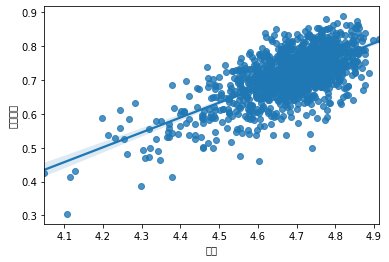

In [27]:
import seaborn as sns
g = sns.regplot(
    data=df4,
    x="별점", y="긍정비율"
)

<AxesSubplot:xlabel='별점', ylabel='긍정비율'>

/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/pyth

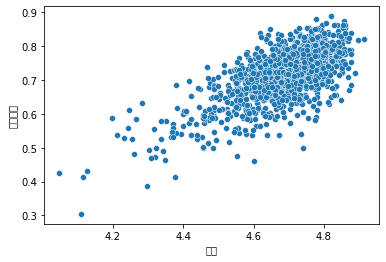

In [25]:
sns.scatterplot(
    data=df4,
    x="별점", y="긍정비율"
)

In [103]:
df_corr = df4.corr()
df_corr[['별점', '긍정비율']]

,별점,긍정비율
상품가격,-0.045272,-0.078422
리뷰수,0.106785,0.086002
스크랩수,0.017994,0.023923
스타일링샷수,0.113121,0.098980
별점,1.000000,0.675711
긍정비율,0.675711,1.000000


# 회귀분석

In [68]:
from statsmodels.formula.api import ols
m = ols('긍정비율 ~ 스크랩수', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6528
Date:                Tue, 01 Nov 2022   Prob (F-statistic):              0.419
Time:                        13:48:43   Log-Likelihood:                 1302.0
No. Observations:                1142   AIC:                            -2600.
Df Residuals:                    1140   BIC:                            -2590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7119      0.003    269.169      0.000       0.707       0.717
스크랩수        9.019e-08   1.12e-07      0.808      0.419   -1.29e-07    3.09e-07
==============================================================================
Omnibus:                      144.032   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.522
Skew:                          -0.840   Prob(JB):                     4.37e-52
Kurtosis:                       4.465   Cond. No.                     2.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
m = ols('긍정비율 ~ 스타일링샷수', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.28
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000810
Time:                        12:02:25   Log-Likelihood:                 1307.3
No. Observations:                1142   AIC:                            -2611.
Df Residuals:                    1140   BIC:                            -2600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7094      0.003    281.898      0.000       0.704       0.714
스타일링샷수      3.242e-06   9.65e-07      3.358      0.001    1.35e-06    5.14e-06
==============================================================================
Omnibus:                      139.500   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.368
Skew:                          -0.821   Prob(JB):                     4.24e-50
Kurtosis:                       4.442   Cond. No.                     2.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
m = ols('긍정비율 ~ 리뷰수', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.495
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00363
Time:                        13:48:46   Log-Likelihood:                 1305.9
No. Observations:                1142   AIC:                            -2608.
Df Residuals:                    1140   BIC:                            -2598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7100      0.003    283.671      0.000       0.705       0.715
리뷰수         2.124e-06   7.29e-07      2.915      0.004    6.94e-07    3.55e-06
==============================================================================
Omnibus:                      140.214   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.855
Skew:                          -0.824   Prob(JB):                     2.02e-50
Kurtosis:                       4.447   Cond. No.                     3.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
m = ols('긍정비율 ~ 별점', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     957.8
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          3.70e-153
Time:                        13:48:50   Log-Likelihood:                 1649.9
No. Observations:                1142   AIC:                            -3296.
Df Residuals:                    1140   BIC:                            -3286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3452      0.067    -20.221      0.000      -1.476      -1.215
별점             0.4397      0.014     30.949      0.000       0.412       0.468
==============================================================================
Omnibus:                       29.559   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.209
Skew:                          -0.362   Prob(JB):                     1.01e-07
Kurtosis:                       3.390   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
m = ols('긍정비율 ~ 스크랩수 + 별점', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     478.8
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.24e-151
Time:                        13:54:11   Log-Likelihood:                 1650.1
No. Observations:                1142   AIC:                            -3294.
Df Residuals:                    1139   BIC:                            -3279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3451      0.067    -20.213      0.000      -1.476      -1.214
스크랩수        4.436e-08   8.23e-08      0.539      0.590   -1.17e-07    2.06e-07
별점             0.4395      0.014     30.925      0.000       0.412       0.467
==============================================================================
Omnibus:                       29.192   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.809
Skew:                          -0.359   Prob(JB):                     1.24e-07
Kurtosis:                       3.391   Cond. No.                     9.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
m = ols('긍정비율 ~ 스타일링샷수 + 별점', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     479.5
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          8.38e-152
Time:                        13:54:38   Log-Likelihood:                 1650.4
No. Observations:                1142   AIC:                            -3295.
Df Residuals:                    1139   BIC:                            -3280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3381      0.067    -20.013      0.000      -1.469      -1.207
스타일링샷수      7.478e-07    7.2e-07      1.039      0.299   -6.64e-07    2.16e-06
별점             0.4380      0.014     30.634      0.000       0.410       0.466
==============================================================================
Omnibus:                       28.927   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.514
Skew:                          -0.357   Prob(JB):                     1.43e-07
Kurtosis:                       3.391   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
m = ols('긍정비율 ~ 리뷰수 + 별점', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     478.9
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.17e-151
Time:                        13:54:42   Log-Likelihood:                 1650.1
No. Observations:                1142   AIC:                            -3294.
Df Residuals:                    1139   BIC:                            -3279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3411      0.067    -20.063      0.000      -1.472      -1.210
리뷰수         3.459e-07   5.42e-07      0.638      0.524   -7.18e-07    1.41e-06
별점             0.4387      0.014     30.696      0.000       0.411       0.467
==============================================================================
Omnibus:                       29.254   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.881
Skew:                          -0.360   Prob(JB):                     1.19e-07
Kurtosis:                       3.391   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
m = ols('긍정비율 ~ 스크랩수 + 스타일링샷수', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     12.96
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           2.72e-06
Time:                        13:55:40   Log-Likelihood:                 1314.5
No. Observations:                1142   AIC:                            -2623.
Df Residuals:                    1139   BIC:                            -2608.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7123      0.003    272.032      0.000       0.707       0.717
스크랩수       -7.865e-07   2.06e-07     -3.809      0.000   -1.19e-06   -3.81e-07
스타일링샷수      9.014e-06   1.79e-06      5.026      0.000     5.5e-06    1.25e-05
==============================================================================
Omnibus:                      136.874   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.368
Skew:                          -0.814   Prob(JB):                     1.40e-48
Kurtosis:                       4.408   Cond. No.                     2.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
m = ols('긍정비율 ~ 리뷰수 + 스타일링샷수', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.672
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000183
Time:                        13:55:40   Log-Likelihood:                 1310.3
No. Observations:                1142   AIC:                            -2615.
Df Residuals:                    1139   BIC:                            -2599.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7090      0.003    281.780      0.000       0.704       0.714
리뷰수          -1.1e-05   4.49e-06     -2.453      0.014   -1.98e-05    -2.2e-06
스타일링샷수      1.764e-05   5.95e-06      2.965      0.003    5.97e-06    2.93e-05
==============================================================================
Omnibus:                      139.794   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.906
Skew:                          -0.823   Prob(JB):                     3.24e-50
Kurtosis:                       4.443   Cond. No.                     4.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
m = ols('긍정비율 ~ 스크랩수 + 리뷰수', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.721
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           0.000467
Time:                        13:55:41   Log-Likelihood:                 1309.4
No. Observations:                1142   AIC:                            -2613.
Df Residuals:                    1139   BIC:                            -2598.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7122      0.003    270.802      0.000       0.707       0.717
스크랩수       -4.948e-07   1.88e-07     -2.627      0.009   -8.64e-07   -1.25e-07
리뷰수         4.743e-06   1.23e-06      3.845      0.000    2.32e-06    7.16e-06
==============================================================================
Omnibus:                      138.237   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.763
Skew:                          -0.818   Prob(JB):                     2.57e-49
Kurtosis:                       4.423   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
m = ols('긍정비율 ~ 리뷰수 + 스타일링샷수 + 별점', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     322.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.21e-151
Time:                        09:54:37   Log-Likelihood:                 1653.3
No. Observations:                1142   AIC:                            -3299.
Df Residuals:                    1138   BIC:                            -3278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3336      0.067    -19.978      0.000      -1.465      -1.203
리뷰수        -7.937e-06   3.33e-06     -2.386      0.017   -1.45e-05   -1.41e-06
스타일링샷수      1.114e-05   4.41e-06      2.524      0.012    2.48e-06    1.98e-05
별점             0.4370      0.014     30.611      0.000       0.409       0.465
==============================================================================
Omnibus:                       27.163   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.431
Skew:                          -0.345   Prob(JB):                     4.07e-07
Kurtosis:                       3.378   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
m = ols('긍정비율 ~ 스크랩수 + 스타일링샷수 + 별점', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     319.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.68e-150
Time:                        09:55:44   Log-Likelihood:                 1650.7
No. Observations:                1142   AIC:                            -3293.
Df Residuals:                    1138   BIC:                            -3273.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3314      0.068    -19.668      0.000      -1.464      -1.199
스크랩수       -1.007e-07   1.56e-07     -0.647      0.518   -4.06e-07    2.05e-07
스타일링샷수      1.495e-06   1.36e-06      1.099      0.272   -1.17e-06    4.16e-06
별점             0.4366      0.014     30.204      0.000       0.408       0.465
==============================================================================
Omnibus:                       29.225   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.853
Skew:                          -0.359   Prob(JB):                     1.21e-07
Kurtosis:                       3.391   Cond. No.                     9.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
m = ols('긍정비율 ~ 스크랩수 + 리뷰수 + 별점', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     319.0
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          2.90e-150
Time:                        09:56:13   Log-Likelihood:                 1650.1
No. Observations:                1142   AIC:                            -3292.
Df Residuals:                    1138   BIC:                            -3272.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3414      0.067    -19.900      0.000      -1.474      -1.209
스크랩수        5.221e-09   1.41e-07      0.037      0.970   -2.71e-07    2.81e-07
리뷰수          3.18e-07   9.27e-07      0.343      0.732    -1.5e-06    2.14e-06
별점             0.4388      0.014     30.478      0.000       0.411       0.467
==============================================================================
Omnibus:                       29.234   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.859
Skew:                          -0.359   Prob(JB):                     1.21e-07
Kurtosis:                       3.391   Cond. No.                     9.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
m = ols('긍정비율 ~ 스크랩수 + 리뷰수 + 스타일링샷수', data = df4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     13.53
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.13e-08
Time:                        09:56:45   Log-Likelihood:                 1321.7
No. Observations:                1142   AIC:                            -2635.
Df Residuals:                    1138   BIC:                            -2615.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7126      0.003    273.621      0.000       0.708       0.718
스크랩수       -1.029e-06   2.15e-07     -4.785      0.000   -1.45e-06   -6.07e-07
리뷰수        -1.764e-05   4.66e-06     -3.788      0.000   -2.68e-05    -8.5e-06
스타일링샷수      3.387e-05    6.8e-06      4.981      0.000    2.05e-05    4.72e-05
==============================================================================
Omnibus:                      134.197   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.881
Skew:                          -0.807   Prob(JB):                     5.94e-47
Kurtosis:                       4.367   Cond. No.                     2.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 상호작용 분석

In [82]:
ols('긍정비율 ~ 리뷰수 + 대분류', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     13.94
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           2.49e-27
Time:                        13:56:42   Log-Likelihood:                 1380.6
No. Observations:                1142   AIC:                            -2735.
Df Residuals:                    1129   BIC:                            -2670.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6683      0.005    145.029      0.000       0.659       0.677
대분류[T.가전]        0.0431      0.010      4.444      0.000       0.024       0.062
대분류[T.데코·식물]     0.0733      0.007     11.173      0.000       0.060       0.086
대분류[T.반려동물]     -0.0311      0.022     -1.391      0.164      -0.075       0.013
대분류[T.생필품]       0.0379      0.042      0.899      0.369      -0.045       0.121
대분류[T.생활용품]      0.0245      0.012      2.110      0.035       0.002       0.047
대분류[T.수납·정리]     0.0367      0.010      3.628      0.000       0.017       0.057
대분류[T.유아·아동]     0.0298      0.037      0.813      0.417      -0.042       0.102
대분류[T.조명]        0.0457      0.011      4.044      0.000       0.024       0.068
대분류[T.주방용품]      0.0588      0.007      8.569      0.000       0.045       0.072
대분류[T.캠핑용품]      0.0139      0.042      0.328      0.743      -0.069       0.097
대분류[T.패브릭]       0.0484      0.007      7.124      0.000       0.035       0.062
리뷰수           2.783e-06   6.93e-07      4.016      0.000    1.42e-06    4.14e-06
==============================================================================
Omnibus:                      130.257   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.655
Skew:                          -0.750   Prob(JB):                     6.06e-50
Kurtosis:                       4.586   Cond. No.                     6.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
ols('긍정비율 ~ 별점 + 대분류', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     92.88
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          6.65e-159
Time:                        13:48:55   Log-Likelihood:                 1693.8
No. Observations:                1142   AIC:                            -3362.
Df Residuals:                    1129   BIC:                            -3296.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2756      0.067    -19.091      0.000      -1.407      -1.145
대분류[T.가전]        0.0006      0.008      0.085      0.932      -0.014       0.015
대분류[T.데코·식물]     0.0342      0.005      6.667      0.000       0.024       0.044
대분류[T.반려동물]     -0.0768      0.017     -4.503      0.000      -0.110      -0.043
대분류[T.생필품]       0.0044      0.032      0.137      0.891      -0.059       0.067
대분류[T.생활용품]     -0.0016      0.009     -0.177      0.860      -0.019       0.016
대분류[T.수납·정리]     0.0189      0.008      2.454      0.014       0.004       0.034
대분류[T.유아·아동]     0.0095      0.028      0.343      0.732      -0.045       0.064
대분류[T.조명]        0.0143      0.009      1.650      0.099      -0.003       0.031
대분류[T.주방용품]      0.0159      0.005      2.971      0.003       0.005       0.026
대분류[T.캠핑용품]     -0.0121      0.032     -0.376      0.707      -0.075       0.051
대분류[T.패브릭]       0.0228      0.005      4.343      0.000       0.012       0.033
별점               0.4217      0.014     29.204      0.000       0.393       0.450
==============================================================================
Omnibus:                       22.473   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.299
Skew:                          -0.336   Prob(JB):                     8.72e-06
Kurtosis:                       3.196   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
ols('긍정비율 ~ 스크랩수 + 대분류', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     13.53
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.85e-26
Time:                        13:56:57   Log-Likelihood:                 1378.4
No. Observations:                1142   AIC:                            -2731.
Df Residuals:                    1129   BIC:                            -2665.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6658      0.005    134.730      0.000       0.656       0.676
대분류[T.가전]        0.0445      0.010      4.556      0.000       0.025       0.064
대분류[T.데코·식물]     0.0761      0.007     11.356      0.000       0.063       0.089
대분류[T.반려동물]     -0.0290      0.022     -1.294      0.196      -0.073       0.015
대분류[T.생필품]       0.0460      0.042      1.088      0.277      -0.037       0.129
대분류[T.생활용품]      0.0289      0.012      2.469      0.014       0.006       0.052
대분류[T.수납·정리]     0.0391      0.010      3.838      0.000       0.019       0.059
대분류[T.유아·아동]     0.0311      0.037      0.847      0.397      -0.041       0.103
대분류[T.조명]        0.0452      0.011      3.998      0.000       0.023       0.067
대분류[T.주방용품]      0.0613      0.007      8.740      0.000       0.048       0.075
대분류[T.캠핑용품]      0.0145      0.042      0.342      0.732      -0.068       0.097
대분류[T.패브릭]       0.0514      0.007      7.506      0.000       0.038       0.065
스크랩수          3.744e-07   1.09e-07      3.436      0.001    1.61e-07    5.88e-07
==============================================================================
Omnibus:                      132.467   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.262
Skew:                          -0.757   Prob(JB):                     3.67e-51
Kurtosis:                       4.608   Cond. No.                     4.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
ols('긍정비율 ~ 스타일링샷수 + 대분류', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     14.35
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           3.39e-28
Time:                        14:27:02   Log-Likelihood:                 1382.7
No. Observations:                1142   AIC:                            -2739.
Df Residuals:                    1129   BIC:                            -2674.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6673      0.005    144.515      0.000       0.658       0.676
대분류[T.가전]        0.0433      0.010      4.470      0.000       0.024       0.062
대분류[T.데코·식물]     0.0736      0.007     11.229      0.000       0.061       0.086
대분류[T.반려동물]     -0.0304      0.022     -1.362      0.173      -0.074       0.013
대분류[T.생필품]       0.0396      0.042      0.941      0.347      -0.043       0.122
대분류[T.생활용품]      0.0253      0.012      2.183      0.029       0.003       0.048
대분류[T.수납·정리]     0.0372      0.010      3.688      0.000       0.017       0.057
대분류[T.유아·아동]     0.0302      0.037      0.826      0.409      -0.042       0.102
대분류[T.조명]        0.0449      0.011      3.982      0.000       0.023       0.067
대분류[T.주방용품]      0.0595      0.007      8.679      0.000       0.046       0.073
대분류[T.캠핑용품]      0.0143      0.042      0.339      0.735      -0.068       0.097
대분류[T.패브릭]       0.0487      0.007      7.171      0.000       0.035       0.062
스타일링샷수         4.15e-06   9.18e-07      4.519      0.000    2.35e-06    5.95e-06
==============================================================================
Omnibus:                      128.659   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.289
Skew:                          -0.743   Prob(JB):                     3.26e-49
Kurtosis:                       4.576   Cond. No.                     5.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
ols('긍정비율 ~ 별점 + 대분류:별점', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     92.65
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          1.31e-158
Time:                        13:49:33   Log-Likelihood:                 1693.1
No. Observations:                1142   AIC:                            -3360.
Df Residuals:                    1129   BIC:                            -3295.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2647      0.068    -18.719      0.000      -1.397      -1.132
별점                  0.4194      0.015     28.672      0.000       0.391       0.448
대분류[T.가전]:별점        0.0002      0.002      0.124      0.901      -0.003       0.003
대분류[T.데코·식물]:별점     0.0072      0.001      6.586      0.000       0.005       0.009
대분류[T.반려동물]:별점     -0.0163      0.004     -4.510      0.000      -0.023      -0.009
대분류[T.생필품]:별점       0.0008      0.007      0.125      0.901      -0.013       0.014
대분류[T.생활용품]:별점     -0.0002      0.002     -0.120      0.905      -0.004       0.003
대분류[T.수납·정리]:별점     0.0040      0.002      2.403      0.016       0.001       0.007
대분류[T.유아·아동]:별점     0.0021      0.006      0.348      0.728      -0.010       0.014
대분류[T.조명]:별점        0.0031      0.002      1.658      0.098      -0.001       0.007
대분류[T.주방용품]:별점      0.0034      0.001      2.948      0.003       0.001       0.006
대분류[T.캠핑용품]:별점     -0.0026      0.007     -0.378      0.705      -0.016       0.011
대분류[T.패브릭]:별점       0.0048      0.001      4.280      0.000       0.003       0.007
==============================================================================
Omnibus:                       22.563   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.399
Skew:                          -0.336   Prob(JB):                     8.30e-06
Kurtosis:                       3.198   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
ols('긍정비율 ~ 스크랩수 + 대분류:스크랩수', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.033
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           3.30e-08
Time:                        13:57:17   Log-Likelihood:                 1331.4
No. Observations:                1142   AIC:                            -2637.
Df Residuals:                    1129   BIC:                            -2571.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7090      0.003    262.152      0.000       0.704       0.714
스크랩수              -3.238e-07   1.35e-07     -2.401      0.017   -5.88e-07   -5.92e-08
대분류[T.가전]:스크랩수     9.824e-07   5.38e-07      1.828      0.068   -7.22e-08    2.04e-06
대분류[T.데코·식물]:스크랩수  2.403e-06   3.88e-07      6.196      0.000    1.64e-06    3.16e-06
대분류[T.반려동물]:스크랩수  -1.152e-05   4.18e-06     -2.756      0.006   -1.97e-05   -3.32e-06
대분류[T.생필품]:스크랩수    2.277e-07   7.43e-06      0.031      0.976   -1.44e-05    1.48e-05
대분류[T.생활용품]:스크랩수  -5.746e-07   1.06e-06     -0.541      0.589   -2.66e-06    1.51e-06
대분류[T.수납·정리]:스크랩수  1.038e-06   6.91e-07      1.504      0.133   -3.17e-07    2.39e-06
대분류[T.유아·아동]:스크랩수  2.762e-07   4.43e-06      0.062      0.950   -8.42e-06    8.97e-06
대분류[T.조명]:스크랩수     7.502e-07    3.3e-07      2.274      0.023    1.03e-07     1.4e-06
대분류[T.주방용품]:스크랩수   1.628e-06   4.92e-07      3.310      0.001    6.63e-07    2.59e-06
대분류[T.캠핑용품]:스크랩수   2.587e-07   2.47e-06      0.105      0.917   -4.59e-06    5.11e-06
대분류[T.패브릭]:스크랩수    6.891e-07   2.55e-07      2.698      0.007    1.88e-07    1.19e-06
==============================================================================
Omnibus:                      145.295   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.821
Skew:                          -0.822   Prob(JB):                     1.26e-55
Kurtosis:                       4.616   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
ols('긍정비율 ~ 스타일링샷수 + 대분류:스타일링샷수', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.478
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           4.60e-07
Time:                        13:57:31   Log-Likelihood:                 1328.2
No. Observations:                1142   AIC:                            -2630.
Df Residuals:                    1129   BIC:                            -2565.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7073      0.003    275.217      0.000       0.702       0.712
스타일링샷수              -3.932e-07   1.32e-06     -0.299      0.765   -2.98e-06    2.19e-06
대분류[T.가전]:스타일링샷수     1.096e-05   5.52e-06      1.986      0.047     1.3e-07    2.18e-05
대분류[T.데코·식물]:스타일링샷수   1.23e-05   2.66e-06      4.618      0.000    7.07e-06    1.75e-05
대분류[T.반려동물]:스타일링샷수     -0.0001   4.71e-05     -2.960      0.003      -0.000    -4.7e-05
대분류[T.생필품]:스타일링샷수    7.932e-06   2.53e-05      0.314      0.754   -4.16e-05    5.75e-05
대분류[T.생활용품]:스타일링샷수   9.023e-06   6.51e-06      1.387      0.166   -3.74e-06    2.18e-05
대분류[T.수납·정리]:스타일링샷수   1.01e-05   6.09e-06      1.660      0.097   -1.84e-06     2.2e-05
대분류[T.유아·아동]:스타일링샷수  2.431e-05   6.42e-05      0.379      0.705      -0.000       0.000
대분류[T.조명]:스타일링샷수     5.936e-06   3.48e-06      1.707      0.088   -8.88e-07    1.28e-05
대분류[T.주방용품]:스타일링샷수   1.698e-05   5.22e-06      3.252      0.001    6.74e-06    2.72e-05
대분류[T.캠핑용품]:스타일링샷수   6.325e-06   3.23e-05      0.196      0.845   -5.71e-05    6.98e-05
대분류[T.패브릭]:스타일링샷수    2.901e-06   2.18e-06      1.331      0.183   -1.38e-06    7.18e-06
==============================================================================
Omnibus:                      143.320   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.586
Skew:                          -0.822   Prob(JB):                     1.28e-53
Kurtosis:                       4.555   Cond. No.                     3.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
ols('긍정비율 ~ 리뷰수 + 대분류:리뷰수', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.924
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           6.06e-06
Time:                        13:57:50   Log-Likelihood:                 1325.0
No. Observations:                1142   AIC:                            -2624.
Df Residuals:                    1129   BIC:                            -2558.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7082      0.003    277.268      0.000       0.703       0.713
리뷰수              -4.074e-07   1.02e-06     -0.398      0.691   -2.41e-06     1.6e-06
대분류[T.가전]:리뷰수      7.05e-06   4.55e-06      1.550      0.122   -1.88e-06     1.6e-05
대분류[T.데코·식물]:리뷰수  8.949e-06   2.07e-06      4.332      0.000     4.9e-06     1.3e-05
대분류[T.반려동물]:리뷰수     -0.0001   3.59e-05     -3.015      0.003      -0.000   -3.78e-05
대분류[T.생필품]:리뷰수    4.553e-06   1.53e-05      0.297      0.767   -2.55e-05    3.46e-05
대분류[T.생활용품]:리뷰수   5.833e-06   4.54e-06      1.285      0.199   -3.08e-06    1.47e-05
대분류[T.수납·정리]:리뷰수  6.886e-06   4.53e-06      1.522      0.128   -1.99e-06    1.58e-05
대분류[T.유아·아동]:리뷰수  1.849e-05   5.74e-05      0.322      0.747   -9.42e-05       0.000
대분류[T.조명]:리뷰수     4.241e-06   3.03e-06      1.401      0.162    -1.7e-06    1.02e-05
대분류[T.주방용품]:리뷰수   1.199e-05   3.78e-06      3.175      0.002    4.58e-06    1.94e-05
대분류[T.캠핑용품]:리뷰수   4.573e-06   2.45e-05      0.186      0.852   -4.36e-05    5.27e-05
대분류[T.패브릭]:리뷰수     1.82e-06    1.6e-06      1.140      0.255   -1.31e-06    4.95e-06
==============================================================================
Omnibus:                      145.088   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.101
Skew:                          -0.830   Prob(JB):                     2.20e-54
Kurtosis:                       4.562   Cond. No.                     4.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
ols('긍정비율 ~ 별점 + 대분류 + 대분류:별점', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     50.15
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          4.46e-154
Time:                        13:49:41   Log-Likelihood:                 1706.4
No. Observations:                1142   AIC:                            -3365.
Df Residuals:                    1118   BIC:                            -3244.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4983      0.120    -12.488      0.000      -1.734      -1.263
대분류[T.가전]          -0.0571      0.251     -0.228      0.820      -0.549       0.435
대분류[T.데코·식물]        0.6091      0.212      2.875      0.004       0.193       1.025
대분류[T.반려동물]         1.0391      0.917      1.133      0.257      -0.760       2.838
대분류[T.생필품]          2.7663      2.454      1.127      0.260      -2.048       7.581
대분류[T.생활용품]        -0.6583      0.349     -1.886      0.059      -1.343       0.026
대분류[T.수납·정리]        0.5927      0.278      2.129      0.033       0.046       1.139
대분류[T.유아·아동]       -0.5552      1.543     -0.360      0.719      -3.583       2.472
대분류[T.조명]           0.1007      0.285      0.353      0.724      -0.459       0.660
대분류[T.주방용품]         0.3172      0.224      1.416      0.157      -0.122       0.757
대분류[T.캠핑용품]         0.3060      1.693      0.181      0.857      -3.015       3.627
대분류[T.패브릭]          0.6155      0.221      2.784      0.005       0.182       1.049
별점                  0.4699      0.026     18.106      0.000       0.419       0.521
대분류[T.가전]:별점        0.0113      0.053      0.211      0.833      -0.094       0.116
대분류[T.데코·식물]:별점    -0.1230      0.045     -2.717      0.007      -0.212      -0.034
대분류[T.반려동물]:별점     -0.2374      0.194     -1.222      0.222      -0.619       0.144
대분류[T.생필품]:별점      -0.5876      0.521     -1.127      0.260      -1.610       0.435
대분류[T.생활용품]:별점      0.1397      0.075      1.871      0.062      -0.007       0.286
대분류[T.수납·정리]:별점    -0.1235      0.060     -2.065      0.039      -0.241      -0.006
대분류[T.유아·아동]:별점     0.1208      0.331      0.365      0.715      -0.529       0.770
대분류[T.조명]:별점       -0.0192      0.061     -0.315      0.753      -0.139       0.100
대분류[T.주방용품]:별점     -0.0649      0.048     -1.358      0.175      -0.159       0.029
대분류[T.캠핑용품]:별점     -0.0686      0.362     -0.190      0.850      -0.778       0.641
대분류[T.패브릭]:별점      -0.1272      0.047     -2.685      0.007      -0.220      -0.034
==============================================================================
Omnibus:                       22.013   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.804
Skew:                          -0.331   Prob(JB):                     1.12e-05
Kurtosis:                       3.202   Cond. No.                     7.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
ols('긍정비율 ~ 스크랩수 + 대분류 + 대분류:스크랩수', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     7.345
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           2.84e-22
Time:                        14:14:11   Log-Likelihood:                 1382.0
No. Observations:                1142   AIC:                            -2716.
Df Residuals:                    1118   BIC:                            -2595.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6670      0.005    125.181      0.000       0.657       0.677
대분류[T.가전]             0.0389      0.012      3.122      0.002       0.014       0.063
대분류[T.데코·식물]          0.0702      0.008      9.051      0.000       0.055       0.085
대분류[T.반려동물]          -0.0164      0.047     -0.350      0.727      -0.109       0.076
대분류[T.생필품]            0.0804      0.112      0.716      0.474      -0.140       0.300
대분류[T.생활용품]           0.0325      0.015      2.198      0.028       0.003       0.062
대분류[T.수납·정리]          0.0277      0.014      2.014      0.044       0.001       0.055
대분류[T.유아·아동]          0.0156      0.062      0.252      0.801      -0.106       0.137
대분류[T.조명]             0.0435      0.014      3.190      0.001       0.017       0.070
대분류[T.주방용품]           0.0589      0.008      7.351      0.000       0.043       0.075
대분류[T.캠핑용품]          -0.0427      0.083     -0.516      0.606      -0.205       0.120
대분류[T.패브릭]            0.0537      0.008      6.621      0.000       0.038       0.070
스크랩수               3.149e-07   1.48e-07      2.132      0.033    2.51e-08    6.05e-07
대분류[T.가전]:스크랩수      4.58e-07   6.65e-07      0.689      0.491   -8.47e-07    1.76e-06
대분류[T.데코·식물]:스크랩수  7.199e-07   4.31e-07      1.670      0.095   -1.26e-07    1.57e-06
대분류[T.반려동물]:스크랩수   -2.78e-06    8.5e-06     -0.327      0.744   -1.95e-05    1.39e-05
대분류[T.생필품]:스크랩수   -6.439e-06    1.9e-05     -0.339      0.735   -4.37e-05    3.08e-05
대분류[T.생활용품]:스크랩수  -6.573e-07    1.3e-06     -0.505      0.614   -3.21e-06     1.9e-06
대분류[T.수납·정리]:스크랩수  1.104e-06   9.11e-07      1.212      0.226   -6.83e-07    2.89e-06
대분류[T.유아·아동]:스크랩수  2.118e-06   7.21e-06      0.294      0.769    -1.2e-05    1.63e-05
대분류[T.조명]:스크랩수     8.821e-08   3.81e-07      0.231      0.817    -6.6e-07    8.37e-07
대분류[T.주방용품]:스크랩수   2.646e-07   5.39e-07      0.491      0.624   -7.93e-07    1.32e-06
대분류[T.캠핑용품]:스크랩수   3.726e-06   4.66e-06      0.800      0.424   -5.41e-06    1.29e-05
대분류[T.패브릭]:스크랩수   -2.082e-07   2.91e-07     -0.715      0.474   -7.79e-07    3.63e-07
==============================================================================
Omnibus:                      132.475   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.112
Skew:                          -0.748   Prob(JB):                     1.97e-52
Kurtosis:                       4.663   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
ols('긍정비율 ~ 리뷰수 + 대분류 + 대분류:리뷰수', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     7.972
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.17e-24
Time:                        14:14:12   Log-Likelihood:                 1388.4
No. Observations:                1142   AIC:                            -2729.
Df Residuals:                    1118   BIC:                            -2608.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6680      0.005    139.235      0.000       0.659       0.677
대분류[T.가전]            0.0387      0.011      3.440      0.001       0.017       0.061
대분류[T.데코·식물]         0.0721      0.007     10.186      0.000       0.058       0.086
대분류[T.반려동물]          0.0023      0.037      0.062      0.951      -0.071       0.076
대분류[T.생필품]          -0.0310      0.147     -0.211      0.833      -0.320       0.258
대분류[T.생활용품]          0.0072      0.015      0.492      0.623      -0.022       0.036
대분류[T.수납·정리]         0.0275      0.012      2.237      0.025       0.003       0.052
대분류[T.유아·아동]        -0.0109      0.061     -0.180      0.858      -0.130       0.108
대분류[T.조명]            0.0451      0.012      3.624      0.000       0.021       0.069
대분류[T.주방용품]          0.0565      0.008      7.328      0.000       0.041       0.072
대분류[T.캠핑용품]         -0.0309      0.067     -0.463      0.644      -0.162       0.100
대분류[T.패브릭]           0.0542      0.007      7.232      0.000       0.039       0.069
리뷰수                2.91e-06   1.03e-06      2.823      0.005    8.87e-07    4.93e-06
대분류[T.가전]:리뷰수     4.105e-06   5.07e-06      0.809      0.419   -5.85e-06    1.41e-05
대분류[T.데코·식물]:리뷰수  1.257e-06   2.12e-06      0.592      0.554   -2.91e-06    5.42e-06
대분류[T.반려동물]:리뷰수  -6.397e-05   5.77e-05     -1.109      0.268      -0.000    4.92e-05
대분류[T.생필품]:리뷰수    2.492e-05   5.11e-05      0.488      0.626   -7.53e-05       0.000
대분류[T.생활용품]:리뷰수   1.071e-05   5.52e-06      1.941      0.053   -1.16e-07    2.15e-05
대분류[T.수납·정리]:리뷰수  7.055e-06   5.32e-06      1.327      0.185   -3.37e-06    1.75e-05
대분류[T.유아·아동]:리뷰수  7.664e-05    9.1e-05      0.842      0.400      -0.000       0.000
대분류[T.조명]:리뷰수     3.702e-07   3.18e-06      0.116      0.907   -5.87e-06    6.61e-06
대분류[T.주방용품]:리뷰수   3.178e-06    4.1e-06      0.776      0.438   -4.86e-06    1.12e-05
대분류[T.캠핑용품]:리뷰수   3.204e-05   3.71e-05      0.863      0.388   -4.08e-05       0.000
대분류[T.패브릭]:리뷰수   -2.951e-06   1.68e-06     -1.760      0.079   -6.24e-06     3.4e-07
==============================================================================
Omnibus:                      130.714   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.654
Skew:                          -0.745   Prob(JB):                     4.98e-51
Kurtosis:                       4.627   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
ols('긍정비율 ~ 스타일링샷수 + 대분류 + 대분류:스타일링샷수', df4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   긍정비율   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     8.225
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.27e-25
Time:                        14:14:12   Log-Likelihood:                 1390.9
No. Observations:                1142   AIC:                            -2734.
Df Residuals:                    1118   BIC:                            -2613.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6676      0.005    138.876      0.000       0.658       0.677
대분류[T.가전]               0.0360      0.011      3.191      0.001       0.014       0.058
대분류[T.데코·식물]            0.0718      0.007     10.076      0.000       0.058       0.086
대분류[T.반려동물]             0.0011      0.039      0.028      0.977      -0.075       0.077
대분류[T.생필품]             -0.0292      0.142     -0.206      0.837      -0.307       0.249
대분류[T.생활용품]             0.0070      0.015      0.481      0.630      -0.022       0.036
대분류[T.수납·정리]            0.0270      0.012      2.196      0.028       0.003       0.051
대분류[T.유아·아동]           -0.0134      0.060     -0.222      0.824      -0.132       0.105
대분류[T.조명]               0.0432      0.013      3.446      0.001       0.019       0.068
대분류[T.주방용품]             0.0568      0.008      7.350      0.000       0.042       0.072
대분류[T.캠핑용품]            -0.0307      0.067     -0.459      0.647      -0.162       0.101
대분류[T.패브릭]              0.0542      0.008      7.149      0.000       0.039       0.069
스타일링샷수               3.929e-06   1.33e-06      2.951      0.003    1.32e-06    6.54e-06
대분류[T.가전]:스타일링샷수     7.796e-06   6.19e-06      1.259      0.208   -4.36e-06       2e-05
대분류[T.데코·식물]:스타일링샷수  1.894e-06   2.77e-06      0.685      0.494   -3.53e-06    7.32e-06
대분류[T.반려동물]:스타일링샷수  -7.869e-05   7.89e-05     -0.998      0.319      -0.000    7.61e-05
대분류[T.생필품]:스타일링샷수    4.137e-05   8.14e-05      0.508      0.611      -0.000       0.000
대분류[T.생활용품]:스타일링샷수   1.634e-05   7.89e-06      2.072      0.039    8.63e-07    3.18e-05
대분류[T.수납·정리]:스타일링샷수  1.051e-05   7.16e-06      1.468      0.142   -3.54e-06    2.45e-05
대분류[T.유아·아동]:스타일링샷수  9.141e-05      0.000      0.901      0.368      -0.000       0.000
대분류[T.조명]:스타일링샷수     1.144e-06   3.69e-06      0.310      0.757   -6.09e-06    8.38e-06
대분류[T.주방용품]:스타일링샷수    4.49e-06   5.69e-06      0.789      0.431   -6.68e-06    1.57e-05
대분류[T.캠핑용품]:스타일링샷수   4.231e-05   4.91e-05      0.862      0.389   -5.39e-05       0.000
대분류[T.패브릭]:스타일링샷수   -3.703e-06   2.33e-06     -1.592      0.112   -8.27e-06     8.6e-07
==============================================================================
Omnibus:                      127.785   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.214
Skew:                          -0.735   Prob(JB):                     2.05e-49
Kurtosis:                       4.598   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

<AxesSubplot:xlabel='별점', ylabel='긍정비율'>

/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nahyunsong/opt/anaconda3/lib/pyth

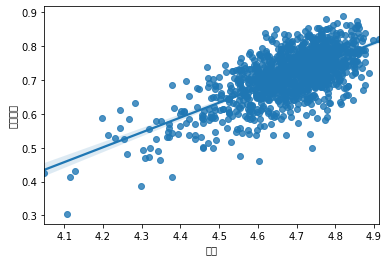

In [128]:
import seaborn as sns
sns.regplot(data = df4, x = '별점', y = '긍정비율')